<a href="https://colab.research.google.com/github/Bogdanf21/NLP2025FII/blob/main/TopicModellingHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wikipedia-api

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=92dea9a08e5b30d6edd00a51ec26e7b39fc095822b74864351f1ea48fee212f8
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


In [ ]:
# 1. Download the 15 Wikipedia documents using wikipedia API.
import wikipediaapi
import random

# Initialize Wikipedia API
wiki = wikipediaapi.Wikipedia(
    user_agent='TopicModellingHomework',
    language='en'
)

# --- Define 3 broad topics and 5 subtopics each ---
topics = {
    "Technology": [
        "Artificial intelligence",
        "Quantum computing",
        "Blockchain",
        "Cybersecurity",
        "Machine learning"
    ],
    "Sports": [
        "Football",
        "Tennis",
        "Basketball",
        "Olympic Games",
        "Marathon"
    ],
    "History": [
        "Roman Empire",
        "Industrial Revolution",
        "Ancient Egypt",
        "World War II",
        "French Revolution"
    ]
}

docs = []
labels = []

# --- Fetch 5 articles per topic ---
for category, titles in topics.items():
    print(f"\nDownloading {category} articles...")
    for title in titles:
        page = wiki.page(title)
        if page.exists():
            print(f"✔️  {title}")
            # Use only the first 3000 characters to avoid overly long texts
            docs.append(page.text[:3000])
            labels.append(category)
        else:
            print(f"⚠️  Page not found: {title}")

print(f"\nDownloaded {len(docs)} documents across {len(topics)} topics.")


✔️  Artificial intelligence
✔️  Quantum computing
✔️  Blockchain
✔️  Cybersecurity
✔️  Machine learning

✔️  Football
✔️  Tennis
✔️  Basketball
✔️  Olympic Games
✔️  Marathon

✔️  Roman Empire
✔️  Industrial Revolution
✔️  Ancient Egypt
✔️  World War II
✔️  French Revolution

Downloaded 15 documents across 3 topics.


In [ ]:
# 2. Lemmatization.
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Download resources (only once)
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")
nltk.download("punkt_tab") # Added to fix the LookupError

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

lemmatized_docs = []
for text in docs:
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]  # remove punctuation + stopwords
    lemmas = [lemmatizer.lemmatize(t) for t in tokens]
    lemmatized_docs.append(lemmas)

print(docs[0][:100])
print(lemmatized_docs[0][:100])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Artificial intelligence (AI) is the capability of computational systems to perform tasks typically a
['artificial', 'intelligence', 'ai', 'capability', 'computational', 'system', 'perform', 'task', 'typically', 'associated', 'human', 'intelligence', 'learning', 'reasoning', 'perception', 'field', 'research', 'computer', 'science', 'develops', 'study', 'method', 'software', 'enable', 'machine', 'perceive', 'environment', 'use', 'learning', 'intelligence', 'take', 'action', 'maximize', 'chance', 'achieving', 'defined', 'goal', 'application', 'ai', 'include', 'advanced', 'web', 'search', 'engine', 'google', 'search', 'recommendation', 'system', 'used', 'youtube', 'amazon', 'netflix', 'virtual', 'assistant', 'google', 'assistant', 'siri', 'alexa', 'autonomous', 'vehicle', 'waymo', 'generative', 'creative', 'tool', 'language', 'model', 'ai', 'art', 'superhuman', 'play', 'analysis', 'strategy', 'game', 'chess', 'go', 'however', 'many', 'ai', 'application', 'perceived', 'ai', 'lot', 'cutting'

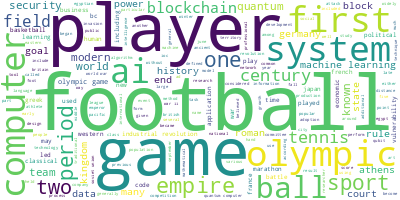

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

flat_list = [word for sublist in lemmatized_docs for word in sublist]
long_string = ' '.join(flat_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# Vectorizarea de tip bag of words.

from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into space-separated strings (CountVectorizer expects text)
joined_docs = [' '.join(tokens) for tokens in lemmatized_docs]

# Initialize and fit the Bag-of-Words model
bow_vectorizer = CountVectorizer(max_features=2000)  # limit vocabulary size if needed
X_bow = bow_vectorizer.fit_transform(joined_docs)

# Inspect results
print("Shape of BOW matrix:", X_bow.shape)  # (num_documents, num_unique_words)
print("Example feature names:", bow_vectorizer.get_feature_names_out()[:20])

# Optional: Convert to DataFrame for readability
import pandas as pd
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
print(bow_df.head())

Shape of BOW matrix: (15, 1870)
Example feature names: ['ability' 'able' 'abolition' 'abuse' 'academic' 'accelerate'
 'accelerated' 'accept' 'acceptance' 'accession' 'accompanied' 'according'
 'accordingly' 'account' 'accuracy' 'achieved' 'achievement' 'achieving'
 'across' 'action']
   ability  able  abolition  abuse  academic  accelerate  accelerated  accept  \
0        1     0          0      0         1           1            1       0   
1        0     0          0      0         1           0            0       0   
2        0     0          0      0         0           0            0       1   
3        0     0          0      0         0           0            0       0   
4        0     0          0      0         0           0            0       0   

   acceptance  accession  ...  writing  wrote  xvi  yd  year  yet  york  \
0           0          0  ...        0      0    0   0     0    0     0   
1           0          0  ...        0      0    0   0     1    1     0   
2  

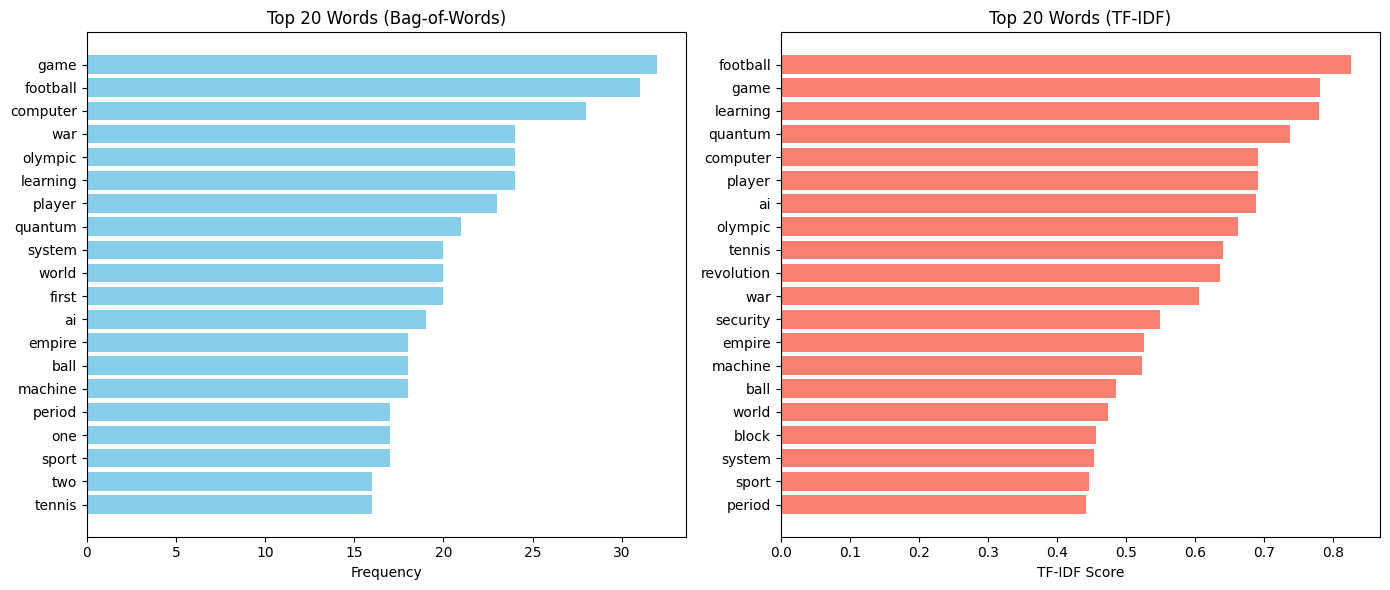

In [ ]:
# Vizualizare bag of words si vectorizare de tip TF-IDF

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Prepare text input for vectorizers ---
joined_docs = [' '.join(tokens) for tokens in lemmatized_docs]

# --- 1️⃣ Bag-of-Words Vectorization ---
bow_vectorizer = CountVectorizer(max_features=2000)
X_bow = bow_vectorizer.fit_transform(joined_docs)

bow_vocab = bow_vectorizer.get_feature_names_out()
bow_freq = np.asarray(X_bow.sum(axis=0)).flatten()

bow_df = pd.DataFrame({'word': bow_vocab, 'count': bow_freq})
bow_df = bow_df.sort_values(by='count', ascending=False).head(20)

# --- 2️⃣ TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(joined_docs)

tfidf_vocab = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()

tfidf_df = pd.DataFrame({'word': tfidf_vocab, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False).head(20)

# --- 3️⃣ Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bag of Words plot
axes[0].barh(bow_df['word'][::-1], bow_df['count'][::-1], color='skyblue')
axes[0].set_title("Top 20 Words (Bag-of-Words)")
axes[0].set_xlabel("Frequency")

# TF-IDF plot
axes[1].barh(tfidf_df['word'][::-1], tfidf_df['score'][::-1], color='salmon')
axes[1].set_title("Top 20 Words (TF-IDF)")
axes[1].set_xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()


In [ ]:
import warnings

# Ignore DeprecationWarning from jupyter_client.session
warnings.filterwarnings("ignore", category=DeprecationWarning, module="jupyter_client.session")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 3️⃣ Latent Semantic Analysis (LSA) using SVD ---
n_components = 3

# LSA on Bag-of-Words
lsa_bow = TruncatedSVD(n_components=n_components, random_state=42)
X_bow_lsa = lsa_bow.fit_transform(X_bow)

# LSA on TF-IDF
lsa_tfidf = TruncatedSVD(n_components=n_components, random_state=42)
X_tfidf_lsa = lsa_tfidf.fit_transform(X_tfidf)

print("Explained variance ratio (BoW):", lsa_bow.explained_variance_ratio_.sum())
print("Explained variance ratio (TF-IDF):", lsa_tfidf.explained_variance_ratio_.sum())

def top_terms_per_concept(svd_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    for i, comp in enumerate(svd_model.components_):
        terms_in_comp = zip(terms, comp)
        sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:n_terms]
        print(f"\nConcept {i + 1}:")
        for term, weight in sorted_terms:
            print(f"{term:15} {weight:.4f}")

print("\n=== Top Terms for BoW-LSA ===")
top_terms_per_concept(lsa_bow, bow_vectorizer)

print("\n=== Top Terms for TF-IDF-LSA ===")
top_terms_per_concept(lsa_tfidf, tfidf_vectorizer)

Explained variance ratio (BoW): 0.28575020273522006
Explained variance ratio (TF-IDF): 0.19007379285534076

=== Top Terms for BoW-LSA ===

Concept 1:
football        0.5441
game            0.2828
ball            0.2157
player          0.2139
olympic         0.1862
sport           0.1640
team            0.1587
code            0.1404
rule            0.1305
goal            0.1252

Concept 2:
learning        0.3951
computer        0.3090
machine         0.2847
quantum         0.2492
ai              0.1877
field           0.1278
system          0.1156
data            0.1148
human           0.1118
algorithm       0.1061

Concept 3:
olympic         0.4364
game            0.3845
war             0.1737
ioc             0.1461
olympics        0.1461
world           0.1423
athlete         0.1079
tennis          0.1077
sport           0.0912
germany         0.0728

=== Top Terms for TF-IDF-LSA ===

Concept 1:
game            0.2014
tennis          0.1940
player          0.1939
football        0.189

In [ ]:
# Observam ca LSA impreuna cu vectorizarea de tip bag of words contureaza mai precis cele trei topici (Tech, Sports, History). In LSA cu vectorizare de tip TF-IDF intalnim mai multe cuvinte care nu ar trebui
# sa fie din acelasi topic. (ex. tennis, ai in concept 1 pentru TF-IDF-LSA).

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n_components = 3

# --- Non-negative Matrix Factorization (NMF) ---
nmf_bow = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_bow_nmf = nmf_bow.fit_transform(X_bow)

nmf_tfidf = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_tfidf_nmf = nmf_tfidf.fit_transform(X_tfidf)

# Reconstruction error (the lower, the better)
print("\nReconstruction error (BoW-NMF):", nmf_bow.reconstruction_err_)
print("Reconstruction error (TF-IDF-NMF):", nmf_tfidf.reconstruction_err_)


# --- Helper: Show top terms per latent concept ---
def top_terms_per_concept(model, vectorizer, n_terms=10, model_name="Model"):
    terms = vectorizer.get_feature_names_out()
    for i, comp in enumerate(model.components_[:5]):  # show only first 5 components
        terms_in_comp = zip(terms, comp)
        sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)[:n_terms]
        print(f"\n{model_name} Concept {i + 1}:")
        for term, weight in sorted_terms:
            print(f"{term:15} {weight:.4f}")


print("\n=== Top Terms for BoW-NMF ===")
top_terms_per_concept(nmf_bow, bow_vectorizer, model_name="NMF (BoW)")

print("\n=== Top Terms for TF-IDF-NMF ===")
top_terms_per_concept(nmf_tfidf, tfidf_vectorizer, model_name="NMF (TF-IDF)")


Reconstruction error (BoW-NMF): 88.59887470920047
Reconstruction error (TF-IDF-NMF): 3.304612791952446

=== Top Terms for BoW-NMF ===

NMF (BoW) Concept 1:
football        5.6867
ball            1.8727
player          1.5186
code            1.4675
team            1.2557
goal            1.1525
rule            1.1084
common          0.9207
sport           0.8459
rugby           0.7338

NMF (BoW) Concept 2:
learning        2.8542
computer        2.2448
machine         2.0356
quantum         1.8323
ai              1.4056
field           1.0694
data            0.8160
human           0.8031
system          0.7808
algorithm       0.7630

NMF (BoW) Concept 3:
game            3.9714
olympic         3.8737
war             1.6016
world           1.5604
sport           1.3716
tennis          1.3111
ioc             1.2711
olympics        1.2711
athlete         0.9432
century         0.9114

=== Top Terms for TF-IDF-NMF ===

NMF (TF-IDF) Concept 1:
football        0.4441
player          0.4365
game

In [ ]:
# Non matrix factorization pare sa se descurce mai bine la extragerea celor trei subiecte fata de LSA. Conceptele sunt mai bine inchegate si nu intalnim cuvinte care nu ar fi din acelasi camp semantic.

In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 62.9 MB/s eta 0:00:00


[['artificial', 'intelligence', 'ai', 'capability', 'computational', 'system', 'perform', 'task', 'typically', 'associated', 'human', 'intelligence', 'learning', 'reasoning', 'perception', 'field', 'research', 'computer', 'science', 'develops', 'study', 'method', 'software', 'enable', 'machine', 'perceive', 'environment', 'use', 'learning', 'intelligence', 'take', 'action', 'maximize', 'chance', 'achieving', 'defined', 'goal', 'application', 'ai', 'include', 'advanced', 'web', 'search', 'engine', 'google', 'search', 'recommendation', 'system', 'used', 'youtube', 'amazon', 'netflix', 'virtual', 'assistant', 'google', 'assistant', 'siri', 'alexa', 'autonomous', 'vehicle', 'waymo', 'generative', 'creative', 'tool', 'language', 'model', 'ai', 'art', 'superhuman', 'play', 'analysis', 'strategy', 'game', 'chess', 'go', 'however', 'many', 'ai', 'application', 'perceived', 'ai', 'lot', 'cutting', 'edge', 'ai', 'filtered', 'general', 'application', 'often', 'without', 'called', 'ai', 'something

[(0, '0.010*"security" + 0.009*"system" + 0.008*"block" + 0.007*"egypt" + 0.006*"computer" + 0.006*"kingdom" + 0.006*"vulnerability" + 0.006*"blockchain" + 0.005*"business" + 0.005*"one"'), (1, '0.016*"game" + 0.016*"football" + 0.012*"olympic" + 0.012*"player" + 0.009*"ball" + 0.009*"sport" + 0.008*"tennis" + 0.007*"team" + 0.007*"revolution" + 0.006*"world"'), (2, '0.010*"learning" + 0.009*"war" + 0.009*"quantum" + 0.008*"computer" + 0.008*"ai" + 0.007*"machine" + 0.006*"empire" + 0.004*"athens" + 0.004*"field" + 0.004*"germany"')]

=== Coherence Scores (c_v) ===
LSA (BoW)      : 0.5822
LSA (TF-IDF)   : 0.4928
NMF (BoW)      : 0.6621
NMF (TF-IDF)   : 0.4357
LDA (Gensim)   : 0.4454


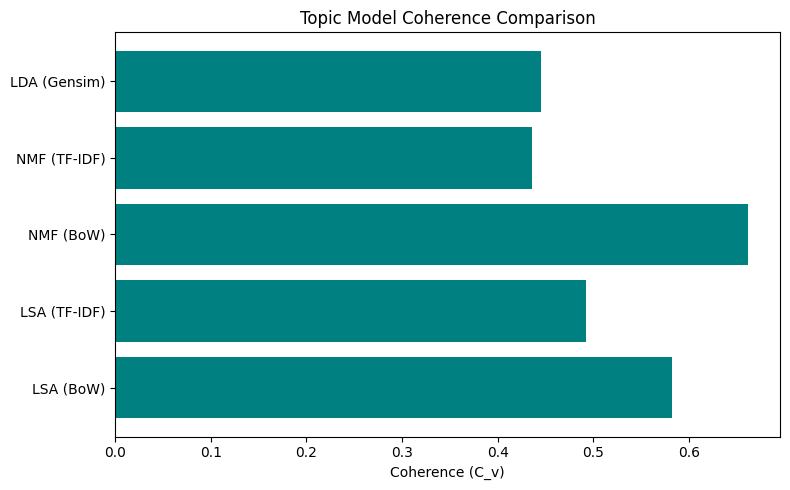

In [ ]:
# ============================================
# Latent Semantic Analysis (LSA), NMF, and Gensim LDA
# with Coherence Evaluation
# ============================================

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
import numpy as np
import matplotlib.pyplot as plt

# --- Assume you already have preprocessed lemmatized_docs ---
joined_docs = [' '.join(tokens) for tokens in lemmatized_docs]

# --- Vectorization ---
bow_vectorizer = CountVectorizer(max_features=2000)
tfidf_vectorizer = TfidfVectorizer(max_features=2000)

X_bow = bow_vectorizer.fit_transform(joined_docs)
X_tfidf = tfidf_vectorizer.fit_transform(joined_docs)

# --- Parameters ---
n_components = 3  # number of topics

# =========================
# 1️⃣ Latent Semantic Analysis (LSA)
# =========================
lsa_bow = TruncatedSVD(n_components=n_components, random_state=42)
X_bow_lsa = lsa_bow.fit_transform(X_bow)

lsa_tfidf = TruncatedSVD(n_components=n_components, random_state=42)
X_tfidf_lsa = lsa_tfidf.fit_transform(X_tfidf)

# =========================
# 2️⃣ Non-negative Matrix Factorization (NMF)
# =========================
nmf_bow = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_bow_nmf = nmf_bow.fit_transform(X_bow)

nmf_tfidf = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=400)
X_tfidf_nmf = nmf_tfidf.fit_transform(X_tfidf)

# =========================
# 3️⃣ Gensim Latent Dirichlet Allocation (LDA)
# =========================
tokenized_docs = [doc.split() for doc in joined_docs]
print(tokenized_docs)
id2word = corpora.Dictionary(tokenized_docs)
corpus = [id2word.doc2bow(text) for text in tokenized_docs]
print(corpus)
lda_gensim = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=n_components,
    random_state=42,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
print(lda_gensim.print_topics())
# =========================
# 4️⃣ Helper: Extract top terms per concept/topic
# =========================
def get_top_words(model_components, feature_names, n_top=10):
    topics = []
    for comp in model_components:
        top_terms = [feature_names[i] for i in comp.argsort()[:-n_top - 1:-1]]
        topics.append(top_terms)
    return topics

# Get top terms
lsa_bow_topics = get_top_words(lsa_bow.components_, bow_vectorizer.get_feature_names_out())
lsa_tfidf_topics = get_top_words(lsa_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
nmf_bow_topics = get_top_words(nmf_bow.components_, bow_vectorizer.get_feature_names_out())
nmf_tfidf_topics = get_top_words(nmf_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
lda_gensim_topics = [[word for word, _ in lda_gensim.show_topic(i, topn=10)] for i in range(n_components)]

# =========================
# 5️⃣ Compute Coherence Scores
# =========================
def compute_coherence(topics, texts, dictionary):
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

coherences = {
    'LSA (BoW)': compute_coherence(lsa_bow_topics, tokenized_docs, id2word),
    'LSA (TF-IDF)': compute_coherence(lsa_tfidf_topics, tokenized_docs, id2word),
    'NMF (BoW)': compute_coherence(nmf_bow_topics, tokenized_docs, id2word),
    'NMF (TF-IDF)': compute_coherence(nmf_tfidf_topics, tokenized_docs, id2word),
    'LDA (Gensim)': compute_coherence(lda_gensim_topics, tokenized_docs, id2word)
}

# =========================
# 6️⃣ Display Results
# =========================
print("\n=== Coherence Scores (c_v) ===")
for model_name, score in coherences.items():
    print(f"{model_name:15}: {score:.4f}")

# --- Optional: visualize ---
plt.figure(figsize=(8, 5))
plt.barh(list(coherences.keys()), list(coherences.values()), color='teal')
plt.xlabel("Coherence (C_v)")
plt.title("Topic Model Coherence Comparison")
plt.tight_layout()
plt.show()

In [ ]:
# Intr-adevar metoda NMF se descurca cel mai bine din punct de vedere al coerentei. Mai multe decat atat, metoda LSA cu BoW se descurca mai bine decat LSA TF-IDF.
# Mai jos vom mai rula LDA cu alte doua seed-uri pentru a observa daca scorul de coerenta se modifica.

[(0, '0.015*"olympic" + 0.014*"game" + 0.013*"ai" + 0.008*"athens" + 0.007*"marathon" + 0.005*"ioc" + 0.005*"olympics" + 0.004*"also" + 0.004*"world" + 0.004*"intelligence"'), (1, '0.011*"computer" + 0.010*"quantum" + 0.009*"learning" + 0.008*"machine" + 0.007*"revolution" + 0.007*"tennis" + 0.006*"security" + 0.005*"industrial" + 0.004*"field" + 0.004*"system"'), (2, '0.014*"football" + 0.009*"war" + 0.008*"empire" + 0.007*"player" + 0.006*"ball" + 0.006*"world" + 0.005*"period" + 0.005*"block" + 0.005*"team" + 0.005*"roman"')]

=== Coherence Scores (c_v) ===
LSA (BoW)      : 0.5822
LSA (TF-IDF)   : 0.4928
NMF (BoW)      : 0.6621
NMF (TF-IDF)   : 0.4357
LDA (Gensim)   : 0.3519


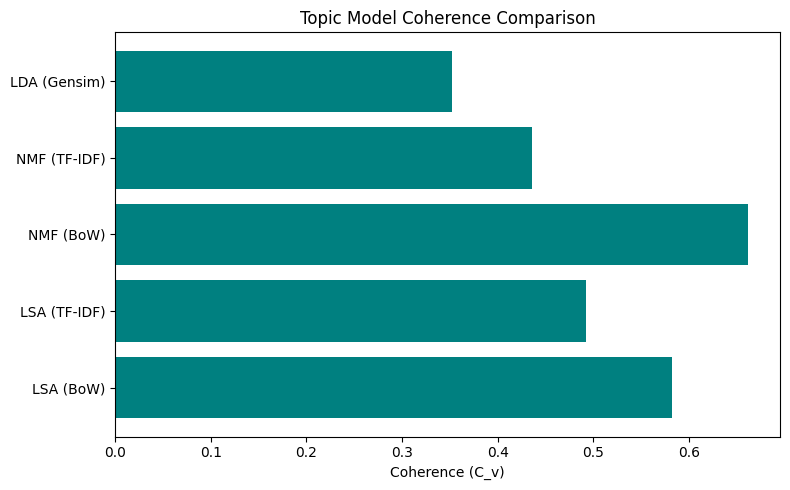

In [ ]:
lda_gensim = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=n_components,
    random_state=50,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
print(lda_gensim.print_topics())
# =========================
# 4️⃣ Helper: Extract top terms per concept/topic
# =========================
def get_top_words(model_components, feature_names, n_top=10):
    topics = []
    for comp in model_components:
        top_terms = [feature_names[i] for i in comp.argsort()[:-n_top - 1:-1]]
        topics.append(top_terms)
    return topics

# Get top terms
lsa_bow_topics = get_top_words(lsa_bow.components_, bow_vectorizer.get_feature_names_out())
lsa_tfidf_topics = get_top_words(lsa_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
nmf_bow_topics = get_top_words(nmf_bow.components_, bow_vectorizer.get_feature_names_out())
nmf_tfidf_topics = get_top_words(nmf_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
lda_gensim_topics = [[word for word, _ in lda_gensim.show_topic(i, topn=10)] for i in range(n_components)]

# =========================
# 5️⃣ Compute Coherence Scores
# =========================
def compute_coherence(topics, texts, dictionary):
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

coherences = {
    'LSA (BoW)': compute_coherence(lsa_bow_topics, tokenized_docs, id2word),
    'LSA (TF-IDF)': compute_coherence(lsa_tfidf_topics, tokenized_docs, id2word),
    'NMF (BoW)': compute_coherence(nmf_bow_topics, tokenized_docs, id2word),
    'NMF (TF-IDF)': compute_coherence(nmf_tfidf_topics, tokenized_docs, id2word),
    'LDA (Gensim)': compute_coherence(lda_gensim_topics, tokenized_docs, id2word)
}

# =========================
# 6️⃣ Display Results
# =========================
print("\n=== Coherence Scores (c_v) ===")
for model_name, score in coherences.items():
    print(f"{model_name:15}: {score:.4f}")

# --- Optional: visualize ---
plt.figure(figsize=(8, 5))
plt.barh(list(coherences.keys()), list(coherences.values()), color='teal')
plt.xlabel("Coherence (C_v)")
plt.title("Topic Model Coherence Comparison")
plt.tight_layout()
plt.show()

[(0, '0.009*"learning" + 0.007*"olympic" + 0.007*"game" + 0.007*"ai" + 0.007*"war" + 0.007*"machine" + 0.006*"system" + 0.005*"computer" + 0.005*"security" + 0.005*"revolution"'), (1, '0.018*"quantum" + 0.012*"computer" + 0.009*"player" + 0.008*"basketball" + 0.006*"classical" + 0.005*"two" + 0.005*"one" + 0.005*"state" + 0.005*"team" + 0.005*"may"'), (2, '0.016*"football" + 0.008*"tennis" + 0.008*"empire" + 0.007*"player" + 0.007*"ball" + 0.006*"first" + 0.005*"game" + 0.005*"athens" + 0.005*"sport" + 0.005*"century"')]

=== Coherence Scores (c_v) ===
LSA (BoW)      : 0.5822
LSA (TF-IDF)   : 0.4928
NMF (BoW)      : 0.6621
NMF (TF-IDF)   : 0.4357
LDA (Gensim)   : 0.3541


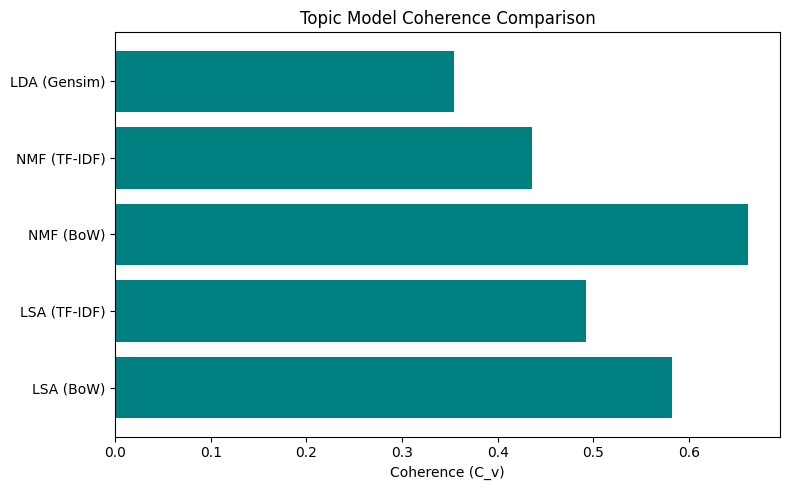

In [ ]:
lda_gensim = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=n_components,
    random_state=1000024,
    passes=10,
    alpha='auto',
    per_word_topics=True
)
print(lda_gensim.print_topics())
# =========================
# 4️⃣ Helper: Extract top terms per concept/topic
# =========================
def get_top_words(model_components, feature_names, n_top=10):
    topics = []
    for comp in model_components:
        top_terms = [feature_names[i] for i in comp.argsort()[:-n_top - 1:-1]]
        topics.append(top_terms)
    return topics

# Get top terms
lsa_bow_topics = get_top_words(lsa_bow.components_, bow_vectorizer.get_feature_names_out())
lsa_tfidf_topics = get_top_words(lsa_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
nmf_bow_topics = get_top_words(nmf_bow.components_, bow_vectorizer.get_feature_names_out())
nmf_tfidf_topics = get_top_words(nmf_tfidf.components_, tfidf_vectorizer.get_feature_names_out())
lda_gensim_topics = [[word for word, _ in lda_gensim.show_topic(i, topn=10)] for i in range(n_components)]

# =========================
# 5️⃣ Compute Coherence Scores
# =========================
def compute_coherence(topics, texts, dictionary):
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    return cm.get_coherence()

coherences = {
    'LSA (BoW)': compute_coherence(lsa_bow_topics, tokenized_docs, id2word),
    'LSA (TF-IDF)': compute_coherence(lsa_tfidf_topics, tokenized_docs, id2word),
    'NMF (BoW)': compute_coherence(nmf_bow_topics, tokenized_docs, id2word),
    'NMF (TF-IDF)': compute_coherence(nmf_tfidf_topics, tokenized_docs, id2word),
    'LDA (Gensim)': compute_coherence(lda_gensim_topics, tokenized_docs, id2word)
}

# =========================
# 6️⃣ Display Results
# =========================
print("\n=== Coherence Scores (c_v) ===")
for model_name, score in coherences.items():
    print(f"{model_name:15}: {score:.4f}")

# --- Optional: visualize ---
plt.figure(figsize=(8, 5))
plt.barh(list(coherences.keys()), list(coherences.values()), color='teal')
plt.xlabel("Coherence (C_v)")
plt.title("Topic Model Coherence Comparison")
plt.tight_layout()
plt.show()

In [ ]:
# Scorul de coerenta pentru LDA pare mai degraba sa scada in alte doua cazuri analizate. (cu seed-urile 1000024 si 50)

In [ ]:
# Calculate and print perplexity for the Gensim LDA model
perplexity_score = lda_gensim.log_perplexity(corpus)
print(f"\nPerplexity for LDA (Gensim): {perplexity_score:.4f}")


Perplexity for LDA (Gensim): -7.4078


In [ ]:
# Teoretic, un nivel mai scazut de Perplexity ar indica o capacitate ridicata a modelului de a generaliza pentru cuvinte noi. (Lower = better). Scorurile in schimb trebuie analizate impreuna (perplexity si coherence).
# Dupa cum observam, NMF cu BoW pare sa interpreteze mai bine datele.

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.7 MB/s eta 0:00:00


In [35]:
from IPython.display import HTML

# Path to your HTML file
html_file_path = './results/ldavis_prepared_10.html'

# Read the HTML file
with open(html_file_path, 'r') as f:
    html_content = f.read()

# Display the HTML in the notebook output
display(HTML(html_content))

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(10))
print(LDAvis_data_filepath)

# Create the directory if it doesn't exist
results_dir = './results'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)


# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_gensim, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(10) +'.html')

LDAvis_prepared

./results/ldavis_prepared_10


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.107760 -0.041648       1        1  52.779667
2     -0.099077 -0.053650       2        1  33.529555
1     -0.008683  0.095299       3        1  13.690778, topic_info=         Term       Freq      Total Category  logprob  loglift
798  football  21.000000  21.000000  Default  30.0000  30.0000
311   quantum  10.000000  10.000000  Default  29.0000  29.0000
40   computer  17.000000  17.000000  Default  28.0000  28.0000
838    player  14.000000  14.000000  Default  27.0000  27.0000
991    tennis  11.000000  11.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
85    however   1.564788   5.808452   Topic3  -5.8594   0.6769
860     sport   1.565489  12.037845   Topic3  -5.8589  -0.0514
131    period   1.565386  12.401508   Topic3  -5.8590  -0.0812
69      field   1.565338  11.034946   Topic3  -5.8590   0.0355
346      time   1.558096   5.723858   Topic3  -5.8636   0.6873

[186 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
878       2  0.744014     account
360       1  0.286095  additional
360       2  0.286095  additional
360       3  0.572191  additional
9         1  0.980852          ai
...     ...       ...         ...
873       2  0.743912        word
874       1  0.685863       world
874       2  0.137173       world
874       3  0.137173       world
1123      3  0.634076       worth

[227 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [ ]:
# Cele trei subiecte par sa fie foarte bine separate, asa cum observam in graficul interactiv.

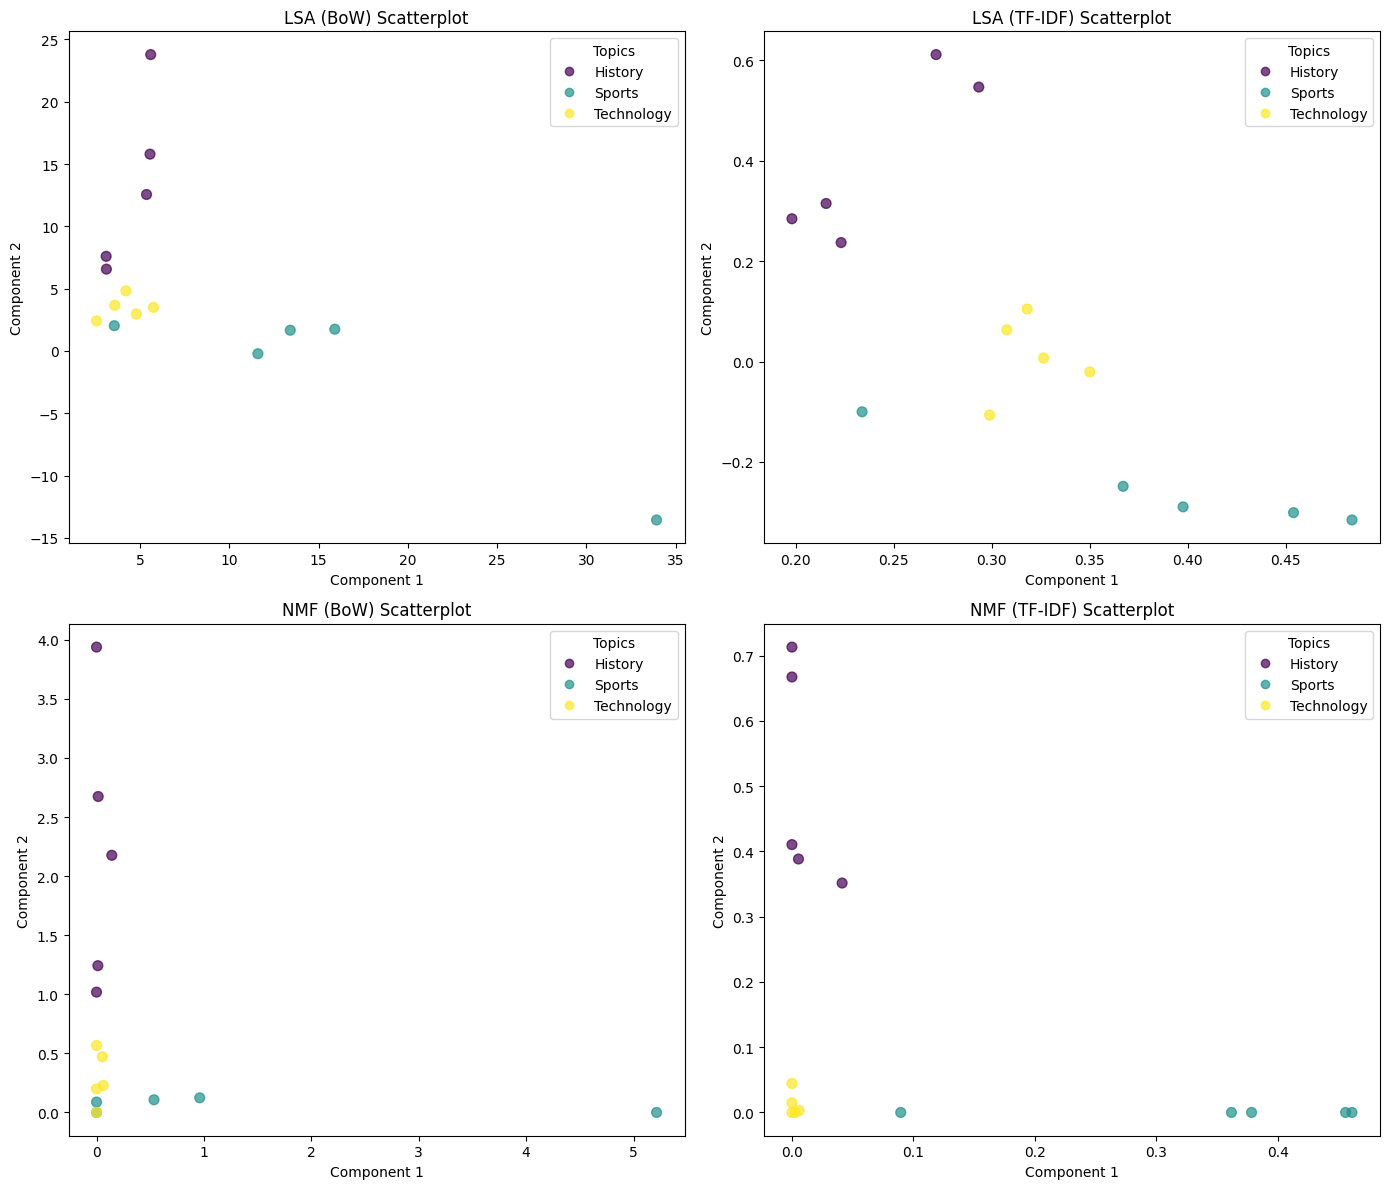

In [ ]:
# Am adaugat scatterplots pentru a vizualiza documentele rezultate in urma reducerilor prin LSA si NMF.

# --- 6️⃣ Visualize LSA and NMF results with Scatterplots ---

def plot_lsa_nmf(X, labels, title, ax):
    """Plots the first two components of the transformed data."""
    scatter = ax.scatter(X[:, 0], X[:, 1], c=[labels.index(label) for label in labels], cmap='viridis', s=50, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    # Add a legend
    legend_labels = sorted(list(set(labels)))
    handles, _ = scatter.legend_elements()
    ax.legend(handles, legend_labels, title="Topics")

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# LSA (BoW)
plot_lsa_nmf(X_bow_lsa, labels, "LSA (BoW) Scatterplot", axes[0, 0])

# LSA (TF-IDF)
plot_lsa_nmf(X_tfidf_lsa, labels, "LSA (TF-IDF) Scatterplot", axes[0, 1])

# NMF (BoW)
plot_lsa_nmf(X_bow_nmf, labels, "NMF (BoW) Scatterplot", axes[1, 0])

# NMF (TF-IDF)
plot_lsa_nmf(X_tfidf_nmf, labels, "NMF (TF-IDF) Scatterplot", axes[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
# Interepretare scatterplots:
# 1. LSA (BoW si TF-IDF): Clusterele sunt destul de amestecate atat la BoW cat si TF-IDF. Cel mai mult observam ca se amesteca subiectele Tech and Sports.
# 2. NMF BoW pare sa fie cea mai buna solutie aici. Clusterele sunt in mare parte formate din documente apropiate in 2D. Exista, in schimb, un overlap intre un document din Sports si unul din Technology.